# adult dataset 

In [1]:
import sys
import os


def initialize_notebook():
    #########################################################
    #  Set the path to the root of the github folder.
    #########################################################
    # Get the current working directory
    current_dir = os.getcwd()
    sys.path.append(current_dir)
    # Construct the full path to the opendataval directory relative to the notebook location
    opendataval_path = os.path.join(current_dir, "../opendataval")

    print(opendataval_path)
    # Add the path to sys.path
    sys.path.append(opendataval_path)

    # Add here the top level path of your project
    # As a subfolder you need the opendataval package.
    current_script_path = os.path.abspath("")
    package_path = os.path.abspath(os.path.join(current_script_path, ".."))

    print("Adding package path", package_path)
    os.chdir(package_path)
    sys.path.append(package_path)

    #########################################################
    #  Add the opendataval as package
    #########################################################
    sys.path.append("opendataval")

initialize_notebook()

/Users/koen/stack/computer-science-delft/master-ai-thesis/tudelft_cs_thesis_wis_github/opendataval/examples/../opendataval
Adding package path /Users/koen/stack/computer-science-delft/master-ai-thesis/tudelft_cs_thesis_wis_github/opendataval


In [2]:
# Imports
import numpy as np
import pandas as pd

# Opendataval
from opendataval.dataloader import Register, DataFetcher, mix_labels, add_gauss_noise
from opendataval.dataval import (
    AME,
    DVRL,
    BetaShapley,
    DataBanzhaf,
    DataOob,
    DataShapley,
    InfluenceSubsample,
    KNNShapley,
    LavaEvaluator,
    LeaveOneOut,
    RandomEvaluator,
    RobustVolumeShapley,
)

from opendataval.experiment import ExperimentMediator

/Users/koen/opt/anaconda3/envs/opendataval/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


## [Step 1] Set up an environment
`ExperimentMediator` is a fundamental concept in establishing the `opendataval` environment. It empowers users to configure hyperparameters, including a dataset, a type of synthetic noise, and a prediction model. With  `ExperimentMediator`, users can effortlessly compute various data valuation algorithms.

The following code cell demonstrates how to set up `ExperimentMediator` with a pre-registered dataset and a prediction model.
- Dataset: adult
- Model: sklearn's logistic regression model
- Metric: Classification accuracy

In [3]:
dataset_name = "adult"
train_count, valid_count, test_count = 1000, 100, 500
noise_rate = 0.0
noise_kwargs = {'noise_rate': noise_rate}
model_name = "sklogreg"
metric_name = "accuracy"

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir="../data_files/",  
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    add_noise=mix_labels, 
    noise_kwargs=noise_kwargs,
    train_kwargs={},
    model_name=model_name,
    metric_name=metric_name
)

Getting dataset from cache_dir ../data_files/
####################################################################################################
# Adding noise?
# Inside the noisify.py file, mix_labels function.
####################################################################################################
ADDING NOISE? {'train_noise': array([], dtype=int64), 'valid_noise': array([], dtype=int64), 'train_replace': array([], dtype=int64)}


A full list of registered datasets can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/dataloader/fetcher.py#L121). A list of available  prediction models can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/model/__init__.py#L111).

## [Step 2] Compute data values
`opendataval` provides various state-of-the-art data valuation algorithms. `ExperimentMediator.compute_data_values()` computes data values.

In [4]:
data_evaluators = [ 
    # RandomEvaluator(),
    # LeaveOneOut(), # leave one out
    # InfluenceSubsample(num_models=1000), # influence function
    DVRL(rl_epochs=2000), # Data valuation using Reinforcement Learning
    DVRL(rl_epochs=2000), # Data valuation using Reinforcement Learning
    DVRL(rl_epochs=2000), # Data valuation using Reinforcement Learning
    DVRL(rl_epochs=2000), # Data valuation using Reinforcement Learning
    # KNNShapley(k_neighbors=valid_count), # KNN-Shapley
    # DataShapley(gr_threshold=1.05, cache_name=f"cached"), # Data-Shapley
    # BetaShapley(gr_threshold=1.05, mc_epochs=300, cache_name=f"cached"), # Beta-Shapley
    # DataBanzhaf(num_models=1000), # Data-Banzhaf
    # AME(num_models=1000), # Average Marginal Effects
    # DataOob(num_models=1000), # Data-OOB
    # LavaEvaluator(),
    # RobustVolumeShapley(mc_epochs=300)
]

In [5]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

Above the self.data_evaluators


100%|██████████| 2000/2000 [00:26<00:00, 74.62it/s]


below the self.data_evaluators
Elapsed time DVRL(rl_epochs=2000): 0:00:27.098371
Above the self.data_evaluators


100%|██████████| 2000/2000 [00:25<00:00, 77.05it/s]


below the self.data_evaluators
Elapsed time DVRL(rl_epochs=2000): 0:00:26.109659
Above the self.data_evaluators


100%|██████████| 2000/2000 [00:28<00:00, 69.53it/s]


below the self.data_evaluators
Elapsed time DVRL(rl_epochs=2000): 0:00:29.033641
Above the self.data_evaluators


100%|██████████| 2000/2000 [00:28<00:00, 69.18it/s]


below the self.data_evaluators
Elapsed time DVRL(rl_epochs=2000): 0:00:29.094057
CPU times: user 8min 3s, sys: 2min 2s, total: 10min 5s
Wall time: 1min 51s


In [6]:
exper_med.fetcher.noisy_train_indices

array([], dtype=int64)

In [20]:
df1 = pd.DataFrame(exper_med.data_evaluators[0].data_values)
df2 = pd.DataFrame(exper_med.data_evaluators[1].data_values)
df3 = pd.DataFrame(exper_med.data_evaluators[2].data_values)
df4 = pd.DataFrame(exper_med.data_evaluators[3].data_values)

In [21]:
df.sort_values(by=[0], ascending=True)


,0
0,0.577051
654,0.577051
655,0.577051
656,0.577051
657,0.577051
...,...
994,0.577051
995,0.577051
996,0.577051
997,0.577051


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcaf68efca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcaf68fc220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcaf68efa00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcaf68fc490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcaf68fc850>],
 'means': []}

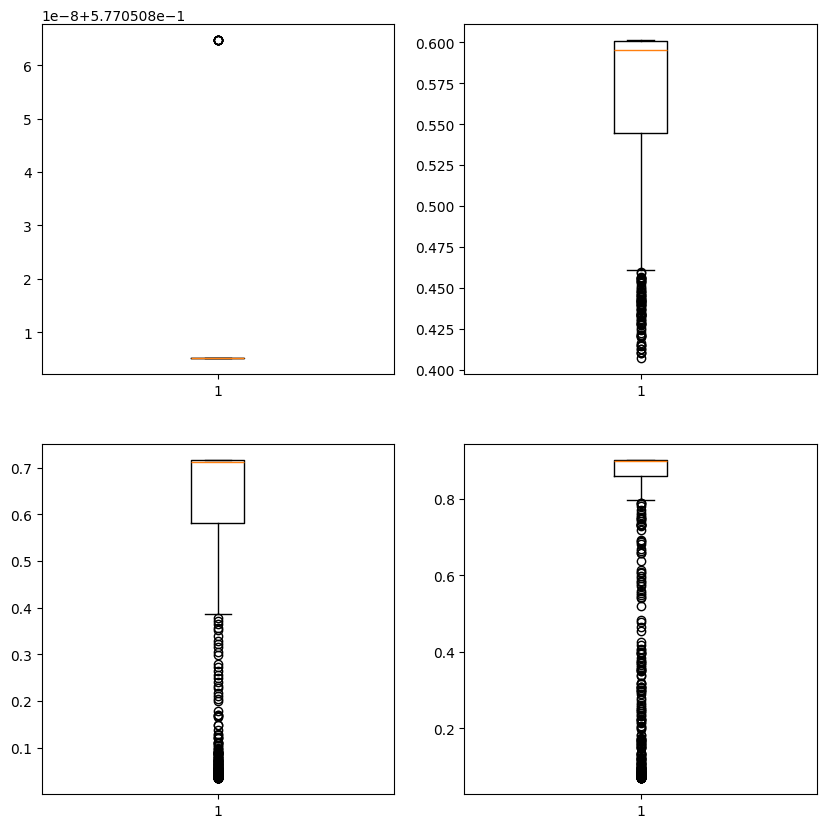

In [23]:
from matplotlib import pyplot as plt

# Plot 4 histograms in a grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].boxplot(df1)
axes[0, 1].boxplot(df2)
axes[1, 0].boxplot(df3)
axes[1, 1].boxplot(df4)


## [Step 3] Evaluate data values

In [10]:
from opendataval.experiment.exper_methods import (
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    save_dataval
)
from matplotlib import pyplot as plt

# Saving the results
output_dir = f"../tmp/{dataset_name}_{noise_rate=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../tmp/adult_noise_rate=0.0/'

### Noisy data detection 
- `noisy_detection` performs the noisy data detection task and evaluates the F1-score of each data valuation algorithm's prediction. The higher, the better.  
  - noisy data: mislabeled data

In [11]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
DVRL(rl_epochs=2000),0.0


### Discover noisy samples
- `discover_corrupted_sample` visualizes how well noisy data points are identified when a fraction of dataset is inspected. 

num_points=1000 num_period=50 num_bins=21
Do i have noisy training indices? [] 0


ZeroDivisionError: division by zero

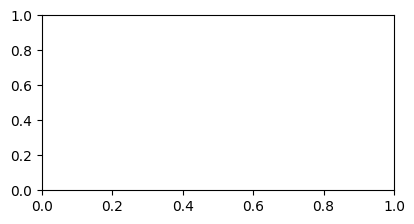

In [12]:
# I do not add noise to the experiment.
# fig = plt.figure(figsize=(10, 5))
# # fig = plt.figure(figsize=(15, 40))
# df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, save_output=True)

### Point removal experiment
- `remove_high_low` performs the point removal experiment. Each data valution algorithm, it provides two curves: one is removing data in a descending order (orange), the other is in an ascending order (blue). As for the orange (resp. blue) curve, the lower (resp. upper), the better. 

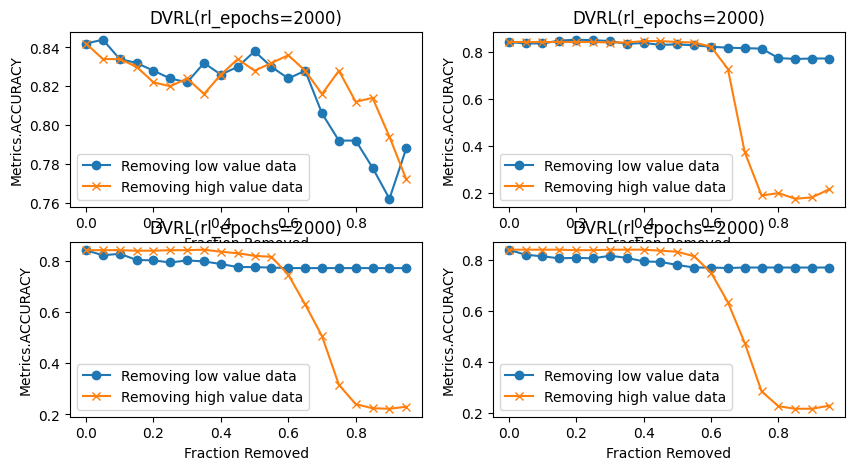

In [13]:
# fig = plt.figure(figsize=(15, 40))
fig = plt.figure(figsize=(10, 5))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, save_output=True)

In [ ]:
df_resp # it provides complete information for generating point-removal experiment figures.

### Save data values
- `save_dataval` stores computed data values at `{output_dir}/save_dataval.csv`.

In [ ]:
exper_med.evaluate(save_dataval, save_output=True)